In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
import experiments

curves = 9
curve_labels = ['Unregularized 1/4x', 'Unregularized 1x', 'Unregularized 4x', 'All Regularizers 1/4x',
                'All Regularizers 1x', 'All Regularizers 4x', 'Random Labels 1/4x', 'Random Labels 1x',
                'Random Labels 4x']
curve_colors = ['lightblue', 'blue', 'darkblue', 'lightgreen', 'limegreen', 'darkgreen', 'salmon', 'red', 'darkred']
curve_styles = ['-', '-', '-', '-', '-', '-', '-', '-', '-']
layers = 4
layer_labels = [1, 2, 3, 4]
crosses = 3

results = np.zeros((curves, layers, 2))
results_test = np.zeros((curves, layers, 2))
# both are indexed [network][layer][avg/std]
# we have to make sure to not be sketchy and state that these are averages within a net instead of between nets

included_nets = [62, 63, 67, 74, 75, 79, 86, 87, 91]

for ID in included_nets:

    print('Processing ID:', ID)
    opt = experiments.opt[ID]

    curve_idx = 0  # unregularized
    if opt.hyper.augmentation:  # all regularizers
        curve_idx += 3
    if opt.dataset.random_labels:
        curve_idx += 6  # random labels
    if opt.dnn.neuron_multiplier[0] == 1:
        curve_idx += 1
    elif opt.dnn.neuron_multiplier[0] == 4:
        curve_idx += 2

    csv_file = experiments.opt[ID].csv_dir + experiments.opt[ID].name + '_redundancy.csv'
    df = pd.read_csv(csv_file)

    selectivity_mean = np.array([[df[df['cross_validation'] == i][df['evaluation_set'] == 'train'][df['layer'] == str(j)]
                                 ['selectivity_mean'].iloc[0] for j in range(layers)] for i in range(crosses)])
    selectivity_std = np.array([[df[df['cross_validation'] == i][df['evaluation_set'] == 'train'][df['layer'] == str(j)]
                                 ['selectivity_std'].iloc[0] for j in range(layers)] for i in range(crosses)])
    selectivity_mean_test = np.array([[df[df['cross_validation'] == i][df['evaluation_set'] == 'test']
                                      [df['layer'] == str(j)]['selectivity_mean'].iloc[0] for j in range(layers)]
                                     for i in range(crosses)])
    selectivity_std_test = np.array([[df[df['cross_validation'] == i][df['evaluation_set'] == 'test']
                                      [df['layer'] == str(j)] ['selectivity_std'].iloc[0] for j in range(layers)]
                                     for i in range(crosses)])

    results[curve_idx, :, 0] = np.mean(selectivity_mean, axis=0)
    results[curve_idx, :, 1] = np.mean(selectivity_std, axis=0)
    results_test[curve_idx, :, 0] = np.mean(selectivity_mean_test, axis=0)
    results_test[curve_idx, :, 1] = np.mean(selectivity_std_test, axis=0)


Processing ID: 62
Processing ID: 63
Processing ID: 67
Processing ID: 74
Processing ID: 75
Processing ID: 79
Processing ID: 86
Processing ID: 87
Processing ID: 91


/cm/shared/openmind/anaconda/2.5.0/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


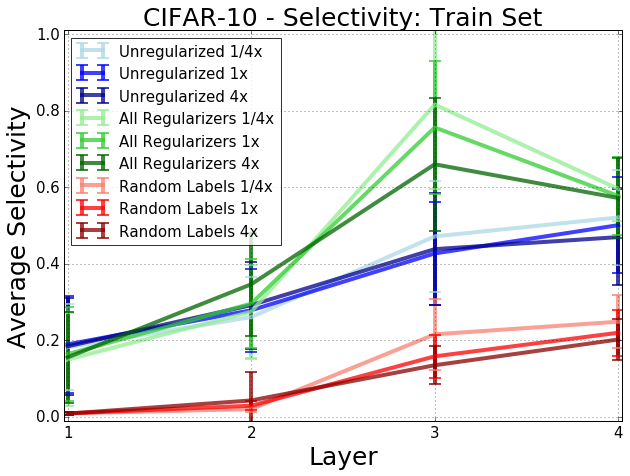

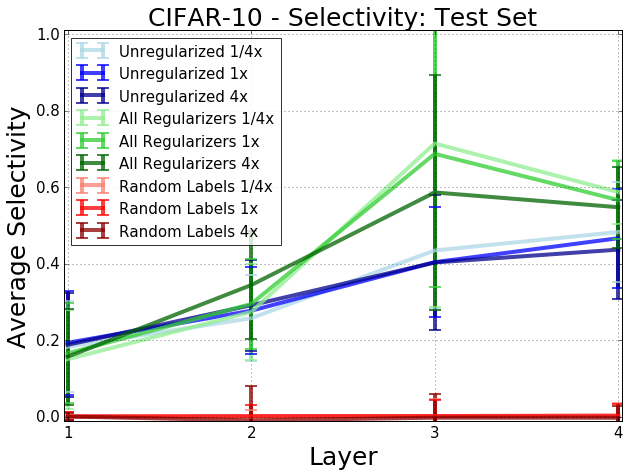

In [10]:
# first plot train curves

% matplotlib inline

plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Selectivity: Train Set', fontsize=25)
plt.xlabel('Layer', fontsize=25)
plt.ylabel('Average Selectivity', fontsize=25)
plt.xlim((0.98, layers+0.02))
plt.ylim((-0.01, 1.01))
plt.grid(True, which='both', c='black')
plt.xticks(layer_labels, fontsize=15)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=15)

for curve_idx in range(curves):
    plt.errorbar(layer_labels, results[curve_idx, :, 0], yerr=results[curve_idx, :, 1].T,
                 color=curve_colors[curve_idx], linestyle=curve_styles[curve_idx], linewidth=4,
                 capsize=6, capthick=2, alpha=0.75)
plt.legend(curve_labels, loc='upper left', framealpha=0.8, fontsize=15)

plt.show()

# second plot test curves

plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Selectivity: Test Set', fontsize=25)
plt.xlabel('Layer', fontsize=25)
plt.ylabel('Average Selectivity', fontsize=25)
plt.xlim((0.98, layers+0.02))
plt.ylim((-0.01, 1.01))
plt.grid(True, which='both', c='black')
plt.xticks(layer_labels, fontsize=15)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=15)

for curve_idx in range(curves):
    plt.errorbar(layer_labels, results_test[curve_idx, :, 0], yerr=results_test[curve_idx, :, 1].T,
                 color=curve_colors[curve_idx], linestyle=curve_styles[curve_idx], linewidth=4,
                 capsize=6, capthick=2,  alpha=0.75)
plt.legend(curve_labels, loc='upper left', framealpha=0.8, fontsize=15)

plt.show()
